**First thing :** know our data distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('placement.csv')
df.shape

(100, 4)

In [ ]:
df['cgpa'].describe()

,cgpa
count,100.000000
mean,5.991000
std,1.143634
min,3.300000
25%,5.075000
50%,6.000000
75%,6.900000
max,8.500000


In [ ]:
df['iq'].describe()

,iq
count,100.000000
mean,123.580000
std,39.944198
min,37.000000
25%,101.500000
50%,127.500000
75%,149.000000
max,233.000000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

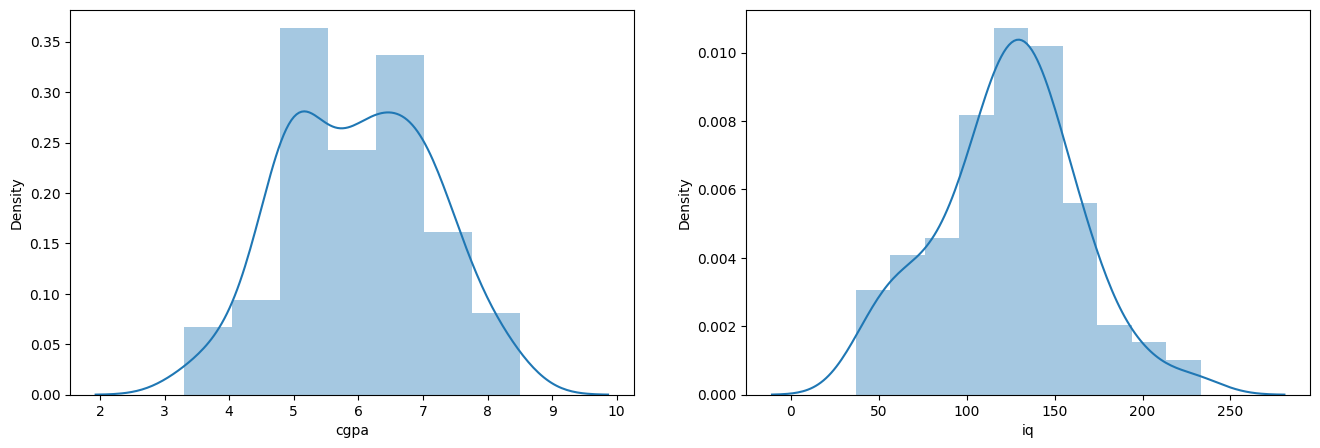

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['iq'])
plt.show()

In [ ]:
df['cgpa'].skew()

-0.0006954038546357086

In [ ]:
df['iq'].skew()

0.018095580898964243

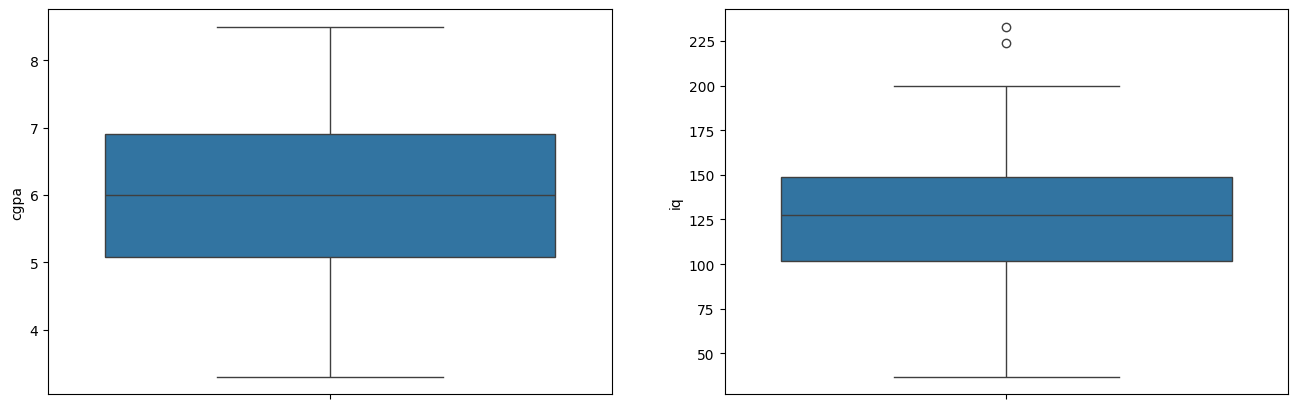

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(df['iq'])
plt.show()

In [ ]:
percentile25 = df['iq'].quantile(0.25)
percentile75 = df['iq'].quantile(0.75)
print(percentile25,percentile75)

101.5 149.0


In [ ]:
IQR = percentile75 - percentile25
print(IQR)

47.5


In [ ]:
Lower_limit = percentile25 - 1.5 * IQR
Upper_limit = percentile75 + 1.5 * IQR
print(Lower_limit,Upper_limit)

30.25 220.25


In [ ]:
unoutlier = df[(df['iq'] > Lower_limit) | (df['iq'] < Upper_limit)]
print(len(unoutlier))

100


In [ ]:
outlier = df[(df['iq'] < Lower_limit) | (df['iq'] > Upper_limit)]
print(len(outlier))

2


In [ ]:
df[(df['iq'] < Lower_limit) | (df['iq'] > Upper_limit)]

,Unnamed: 0,cgpa,iq,placement
16,16,5.2,224.0,0
50,50,3.5,233.0,0


In [ ]:
new_df = df[(df['iq'] < Upper_limit)&(df['iq'] > Lower_limit)]

In [ ]:
percentile25_2 = new_df['iq'].quantile(0.25)
percentile75_2 = new_df['iq'].quantile(0.75)
IQR_2 = percentile75 - percentile25
Lower_limit_2 = percentile25_2 - 1.5 * IQR_2
Upper_limit_2 = percentile75_2 + 1.5 * IQR_2
print("Maximum value :",new_df['iq'].max()," Ubber Bond", Upper_limit_2)
print("Minimum value :",new_df['iq'].min()," Lower Bond", Lower_limit_2)

Maximum value : 200.0  Ubber Bond 212.375
Minimum value : 37.0  Lower Bond 33.375


In [ ]:
print(new_df['iq'].max()," the comprasion", Upper_limit)

200.0

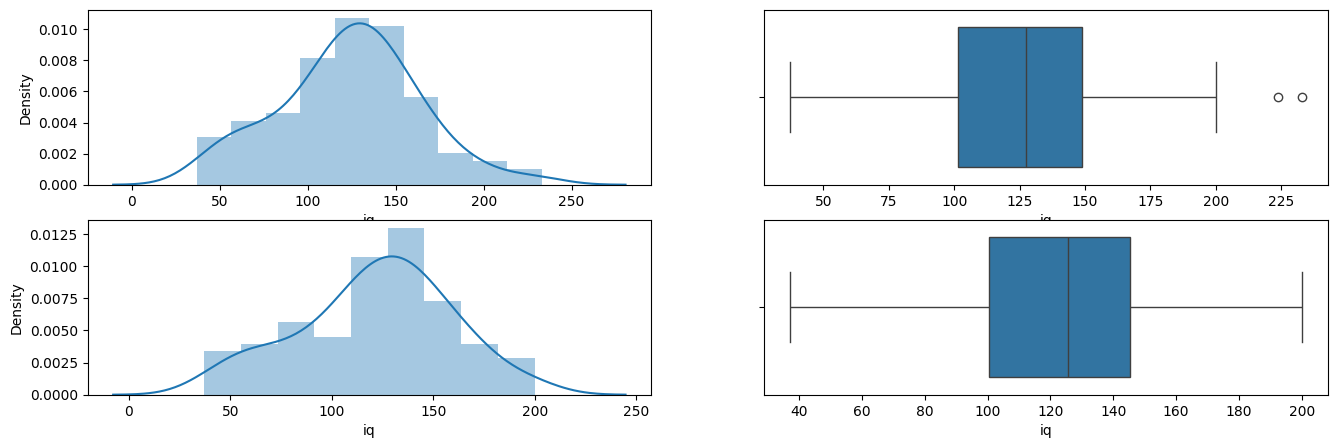

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(2,2,1)
sns.distplot(df['iq'])
plt.subplot(2,2,2)
sns.boxplot(x = df['iq'], data = df)

plt.subplot(2,2,3)
sns.distplot(new_df['iq'])
plt.subplot(2,2,4)
sns.boxplot(x= new_df['iq'], data =new_df)
plt.show()

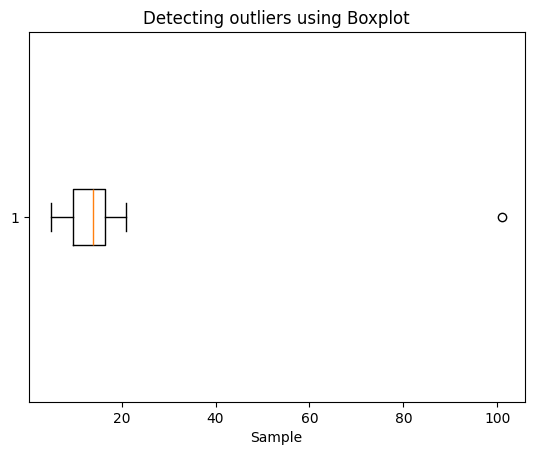

In [ ]:
import matplotlib.pyplot as plt

sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)


Outliers from Z-scores method:  [101]


In [ ]:
utliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101, 101]
